In [1]:
import matplotlib.pyplot as plt

from cgan.cgan import CGAN
from scgan.cgan.discriminative_network import DiscriminativeNetwork
from scgan.cgan.generative_network import GenerativeNetwork
from scgan.data.generator import SentinelDataGenerator, Purpose

Using TensorFlow backend.


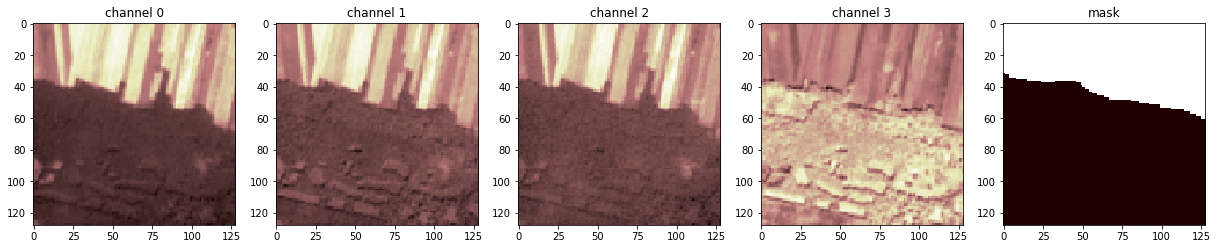

In [2]:
data_generator = SentinelDataGenerator('sample')
data_generator.images_df(Purpose.TRAIN)

l, r = next(data_generator.load(1))

fig, axs = plt.subplots(1, 5, figsize=(21,7))
for index, ax in enumerate(axs):
    if index < 4:
        ax.imshow(l[0][:, :, index], cmap='pink')
        ax.set_title('channel %s' % index)
    else:
        ax.imshow(r[0][:, :, 0], cmap='pink')
        ax.set_title('mask')
        
plt.savefig('../figs/sample.png')

In [3]:
generative_network = GenerativeNetwork()
gen_model = generative_network.build(init_filters=32, input_shape=(128, 128, 1), output_channels=4)
gen_model.summary()














__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 64, 64, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   32832       leaky_re_lu_1[0][0]              
________________________________________________________________________________________________

In [4]:
discriminative_network = DiscriminativeNetwork()
disc_model = discriminative_network.build(init_filters=32, input_shape=(128, 128, 4), condition_shape=(128, 128, 1))
disc_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 128, 128, 5)  0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 32)   2592        concatenate_7[0][0]              
__________

In [5]:
cgan = CGAN(data_generator, disc_model, gen_model, input_shape=(128, 128, 4), condition_shape=(128, 128, 1))
cgan.cgan_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128, 128, 4)  10468676    input_5[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 8, 8, 1)      697057      model_1[1][0]                    
                                                                 input_5[0][0]                    
Total params: 11,165,733
Trainable params: 10,464,260
Non-trainable params: 701,473
__________________________________________________________________________________________________
